### **Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow**

**Computer Vision** is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing a car in front.

### **Get the data**

In [21]:
import zipfile

# Unzip
zip_ref = zipfile.ZipFile('data/pizza_steak.zip')
zip_ref.extractall('data')
zip_ref.close()

### **Inspect the data**

A very crucial step at the beggining of every ML project is becoming one with the data. And for Computer Vision it usually means visualising many samples of your data.

In [22]:
import os
os.listdir('data/pizza_steak')

['test', 'train']

In [23]:
os.listdir('data/pizza_steak/train')

['pizza', 'steak']

In [24]:
os.listdir('data/pizza_steak/train/steak')[:5]

['1000205.jpg', '100135.jpg', '101312.jpg', '1021458.jpg', '1032846.jpg']

In [25]:
# Walk through pizza_stead directory and list number of files

for dirpath, dirnames, filenames in os.walk('data/pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in data/pizza_steak.
There are 2 directories and 0 images in data/pizza_steak\test.
There are 0 directories and 250 images in data/pizza_steak\test\pizza.
There are 0 directories and 250 images in data/pizza_steak\test\steak.
There are 2 directories and 0 images in data/pizza_steak\train.
There are 0 directories and 750 images in data/pizza_steak\train\pizza.
There are 0 directories and 750 images in data/pizza_steak\train\steak.


In [26]:
num_steak_images_train = len(os.listdir('data/pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images first let's get the class names programmatically.

In [27]:
# Get the class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path('data/pizza_steak/train')
# Create a list of class names for the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
class_names

array(['pizza', 'steak'], dtype='<U5')

In [185]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    '''
    Prints a random image in target_class from target_dir.
    '''
    # Setup the target directory
    target_folder = target_dir + '/' + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    # Show the shape of the image
    print(f'Image shape: {img.shape}') 

    return img

['1649108.jpg']
Image shape: (512, 512, 3)


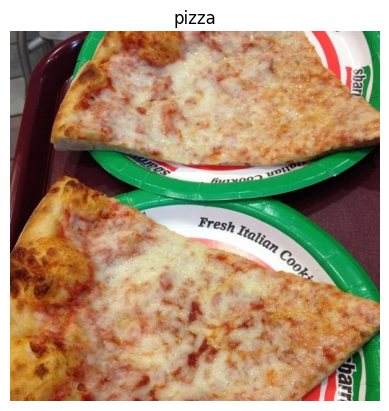

In [29]:
# View a random image from the training dataset
img = view_random_image(target_dir='data/pizza_steak/train',
                        target_class='pizza')

In [30]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 96, 100,  99],
        [ 98, 102, 101],
        [100, 102,  99],
        ...,
        [ 15, 136,  67],
        [ 19, 135,  70],
        [ 22, 138,  73]],

       [[ 96, 100,  99],
        [ 97, 101, 100],
        [100, 102,  99],
        ...,
        [ 28, 147,  79],
        [ 26, 142,  77],
        [ 15, 131,  66]],

       [[ 99, 101, 100],
        [ 99, 101, 100],
        [ 99, 101,  98],
        ...,
        [ 32, 151,  85],
        [ 31, 147,  84],
        [ 18, 132,  70]],

       ...,

       [[168,  95,  26],
        [168,  95,  26],
        [170,  98,  26],
        ...,
        [ 13, 134,  54],
        [ 17, 138,  58],
        [ 21, 142,  62]],

       [[172, 102,  32],
        [171, 101,  31],
        [174, 104,  32],
        ...,
        [ 15, 136,  56],
        [ 19, 140,  60],
        [ 22, 143,  63]],

       [[173, 103,  33],
        [172, 102,  32],
        [176, 106,  34],
        ...,
        [ 17, 138,  5

In [31]:
img.shape # retuns (width, height, colour channels)

(512, 512, 3)

### **Data preprocessing**

**Normalization**

In [32]:
img/225.0

array([[[0.42666667, 0.44444444, 0.44      ],
        [0.43555556, 0.45333333, 0.44888889],
        [0.44444444, 0.45333333, 0.44      ],
        ...,
        [0.06666667, 0.60444444, 0.29777778],
        [0.08444444, 0.6       , 0.31111111],
        [0.09777778, 0.61333333, 0.32444444]],

       [[0.42666667, 0.44444444, 0.44      ],
        [0.43111111, 0.44888889, 0.44444444],
        [0.44444444, 0.45333333, 0.44      ],
        ...,
        [0.12444444, 0.65333333, 0.35111111],
        [0.11555556, 0.63111111, 0.34222222],
        [0.06666667, 0.58222222, 0.29333333]],

       [[0.44      , 0.44888889, 0.44444444],
        [0.44      , 0.44888889, 0.44444444],
        [0.44      , 0.44888889, 0.43555556],
        ...,
        [0.14222222, 0.67111111, 0.37777778],
        [0.13777778, 0.65333333, 0.37333333],
        [0.08      , 0.58666667, 0.31111111]],

       ...,

       [[0.74666667, 0.42222222, 0.11555556],
        [0.74666667, 0.42222222, 0.11555556],
        [0.75555556, 0

### **An end-to-end example**

Let's build a Convolutional Neural Network to find patterns in our images, more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns 
* Compile a CNN
* Fit a CNN to the training data

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1 - normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = 'data/pizza_steak/train'
test_dir = 'data/pizza_steak/train'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# # Build a CNN model
# model_1 = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=10, 
#                            kernel_size=3,
#                            activation='relu',
#                            input_shape=(224, 224, 3)),
#     tf.keras.layers.Conv2D(10, 3, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=2,
#                               padding='valid'),
#     tf.keras.layers.Conv2D(10, 3, activation='relu'),
#     tf.keras.layers.Conv2D(10, 3, activation='relu'),
#     tf.keras.layers.MaxPool2D(2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

# # Compile a CNN
# model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
#                 optimizer=tf.keras.optimizers.Adam(),
#                 metrics=['accuracy'])

# history_1 = model_1.fit(train_data,
#                         epochs=5,
#                         steps_per_epoch=len(train_data),
#                         validation_data=valid_data,
#                         validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [34]:
#model_1.summary()

### **Save a model**

In [35]:
#model_1.save('saved_models/cnn_model_1')

### **Load a model**

In [36]:
# Load a model_1
model_1 = tf.keras.models.load_model('saved_models/cnn_model_1')

# Get a summary of a model_1
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [37]:
# Evaluate model_1
model_1.evaluate(train_data)

47/47 [==============================] - 13s 269ms/step - loss: 0.2492 - accuracy: 0.9120


[0.2492406666278839, 0.9120000004768372]

### **Using the same model as before to compare the results**

Let's replicate the model we've built in a previous section to see if it works with our image data.

In [38]:
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit a model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=(len(valid_data)))

Epoch 1/5
47/47 [==============================] - 7s 136ms/step - loss: 0.6623 - accuracy: 0.5773 - val_loss: 0.6209 - val_accuracy: 0.6747
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6334 - accuracy: 0.6540 - val_loss: 0.5881 - val_accuracy: 0.7247
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.5755 - accuracy: 0.7140 - val_loss: 0.6421 - val_accuracy: 0.6080
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.6058 - accuracy: 0.6740 - val_loss: 0.6227 - val_accuracy: 0.6340
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.5564 - accuracy: 0.7467 - val_loss: 0.5364 - val_accuracy: 0.7520


In [39]:
# Get a summary of model_2
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than CNN (model_1), model_2 performs terribly...it's basicall guessing.

In [40]:
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit a model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 4.0270 - accuracy: 0.5987 - val_loss: 2.2245 - val_accuracy: 0.6313
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 1.1849 - accuracy: 0.6993 - val_loss: 0.5873 - val_accuracy: 0.7573
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.7742 - accuracy: 0.7100 - val_loss: 0.5307 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.5754 - accuracy: 0.7453 - val_loss: 0.4717 - val_accuracy: 0.7827
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6592 - accuracy: 0.7307 - val_loss: 0.6602 - val_accuracy: 0.7667


In [41]:
# Get a  summary of model_3
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better and in most cases  it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible trainable parameters, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there is less trainable in a convolutional neural network, these are often more helpful in deciphering between different **features** in an image.

## **Binary Classifiaction: Let's break it down**

1. **Become on with the data** (visualize, visualize, visualize)
2. **Preprocess the data** (prepare it for the model, the main step was scaling/normalizing & turning data into batches)
3. **Create a model** (start with a baseline)
4. **Fit the model**
5. **Evaluate a model**
6. **Adjust different parameters and improve the model** (try to beat the baseline)
7. **Repeat until satisfied** (experiment, experiment, experiment)

### **1. Become one with the data**

['2629750.jpg']
Image shape: (512, 512, 3)
['3164761.jpg']
Image shape: (512, 512, 3)


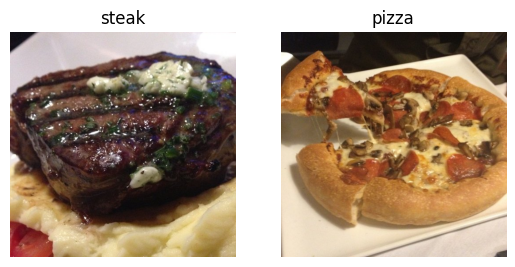

In [42]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('data/pizza_steak/train', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('data/pizza_steak/train', 'pizza')

### **2. Preprocess the data**

In [43]:
# Define directory dataset paths

train_dir = 'data/pizza_steak/train'
test_dir = 'data/pizza_steak/test'

Next step is to turn data into **batches**.

A batch is a small subset of data. Rather than look at all images at one time, a model might only look at 32 at a time.

It does this for a couple of resaons:
1. Too many images might not fit into the memory of GPU.
2. Trying to learn patterns in too many images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health...and **Yann LeCun** said so.

In [44]:
# Create train a test data generatios and rescale the data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [45]:
# Load in images from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # target directory for images
                                               target_size=(224, 224), # target size of images (height, width)
                                               class_mode='binary', # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [46]:
# Get a saple of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [47]:
# How many batches are there?
len(train_data)

47

In [48]:
# Get the first two images
images[0], images[0].shape

(array([[[0.46274513, 0.48235297, 0.27058825],
         [0.48235297, 0.49803925, 0.29803923],
         [0.44705886, 0.454902  , 0.25882354],
         ...,
         [0.08627451, 0.18431373, 0.20000002],
         [0.10196079, 0.20392159, 0.20784315],
         [0.10196079, 0.20392159, 0.19215688]],
 
        [[0.2901961 , 0.31764707, 0.1137255 ],
         [0.3254902 , 0.34117648, 0.14117648],
         [0.43137258, 0.43137258, 0.23529413],
         ...,
         [0.12941177, 0.21176472, 0.22352943],
         [0.1137255 , 0.19607845, 0.20000002],
         [0.10980393, 0.20784315, 0.19215688]],
 
        [[0.67058825, 0.69803923, 0.48627454],
         [0.5176471 , 0.5372549 , 0.31764707],
         [0.53333336, 0.5372549 , 0.3137255 ],
         ...,
         [0.14901961, 0.21176472, 0.20784315],
         [0.1254902 , 0.20000002, 0.19215688],
         [0.12941177, 0.20392159, 0.18039216]],
 
        ...,
 
        [[0.6039216 , 0.6509804 , 0.454902  ],
         [0.6039216 , 0.6509804 , 0.45490

In [49]:
# View the first batch of labels
labels

array([1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

### **3. Create a CNN model (start with a baseline)**

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

🔑 **Note:** In deep learning, there is almost infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [50]:
# Make the creating of our model a little easier
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
# from tensorflow.keras.models import Sequential

In [51]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
tf.random.set_seed(42)

model_4 = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Conv2D(filters=10, # filters is the number of sliding windows going across an input (higher = more complex model)
                           kernel_size=(3, 3), # the size of the sliding window going across an input
                           strides=(1, 1), # the size of the step the sliding window takes across an input
                           padding='valid', # if 'same', output shape is same as input shape if 'valid', output shape gest compressed
                           activation='relu',
                           input_shape=(224, 224, 3)), 
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'), # this layer is the same as the one above
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer (working with binary classification so only one output neuron)
])

### **Breakdown of Conv2D layer**

**Example code:** tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), padding='same')

**Example code 2 (same as above):** tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding='same')

**Example code 3 (same as above):** tf.keras.layers.Conv2D(10, 3, 1, 'same')


| **Hyperparameter Name** | **What does it do?** | **Typical values**
| :------------: | :-------:  | :-------:  |
| **Filters** | Decides how many filters should pass over an <br> input tensor (e.g. sliding windows over an <br> image). | 10, 32, 64, 128 (higher values lead to more <br> complex models)
| **Kernel size <br> (also called filter size)** | Determines the shape of the filters (sliding <br> windows) over the output. | 3, 5, 7 (lower values learn smaller features, <br> higher values learn larger features)
| **Padding** | Pads the target tensor with zeros (if "same") <br> to preserve input shape, or leaves in the <br> target tensor as it is (if 'valid), lowering <br> output shape. | 'same' or 'valid'
| **Strides** | The number of steps a filter takes across an <br> image at a time (e.g. if *strides*=1, a filter <br> moves across an image 1 pixel at a time). | 1 (default), 2

📖 **Resource:** For an interactive demonstration of the above hyperparameters, see the [CNN explainer website](https://poloclub.github.io/cnn-explainer/).

In [52]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [53]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### **4. Fit the model**

In [54]:
# Check the lengths (in batches) of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [55]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 49s 1s/step - loss: 2.3797 - accuracy: 0.6253 - val_loss: 0.5180 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 56s 1s/step - loss: 0.4839 - accuracy: 0.7747 - val_loss: 0.4663 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 53s 1s/step - loss: 0.3790 - accuracy: 0.8420 - val_loss: 0.3810 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.2263 - accuracy: 0.9200 - val_loss: 0.3626 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 54s 1s/step - loss: 0.0939 - accuracy: 0.9707 - val_loss: 0.4545 - val_accuracy: 0.7940


### **5. Evaluating the model**

It looks like the model is learning something, let's evaluate it.

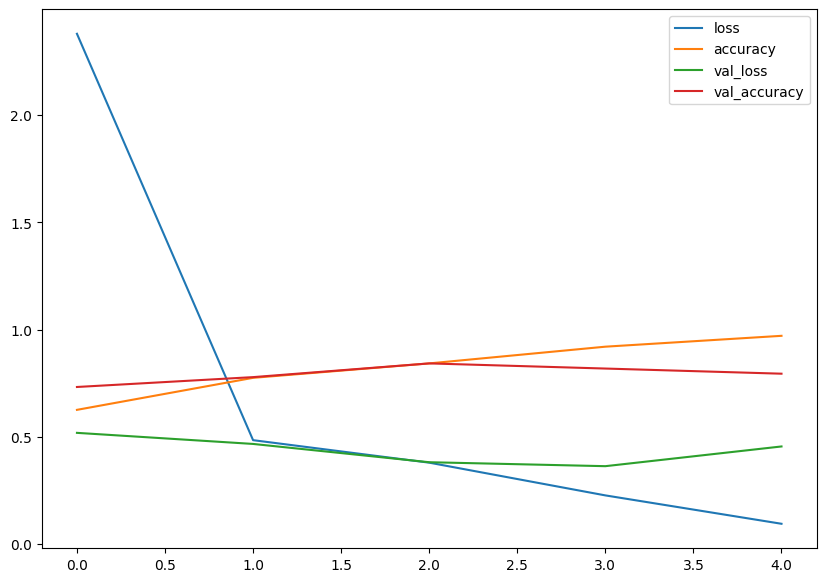

In [56]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [57]:
# Plot the validatio and training curves separately
def plot_loss_curves(history):
    '''
    Returns sepatrate loss curves for training and validation metrics
    '''
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # how many epochs did we run for

    # Plot loss
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that model is **overfitting** the training dataset. This means it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

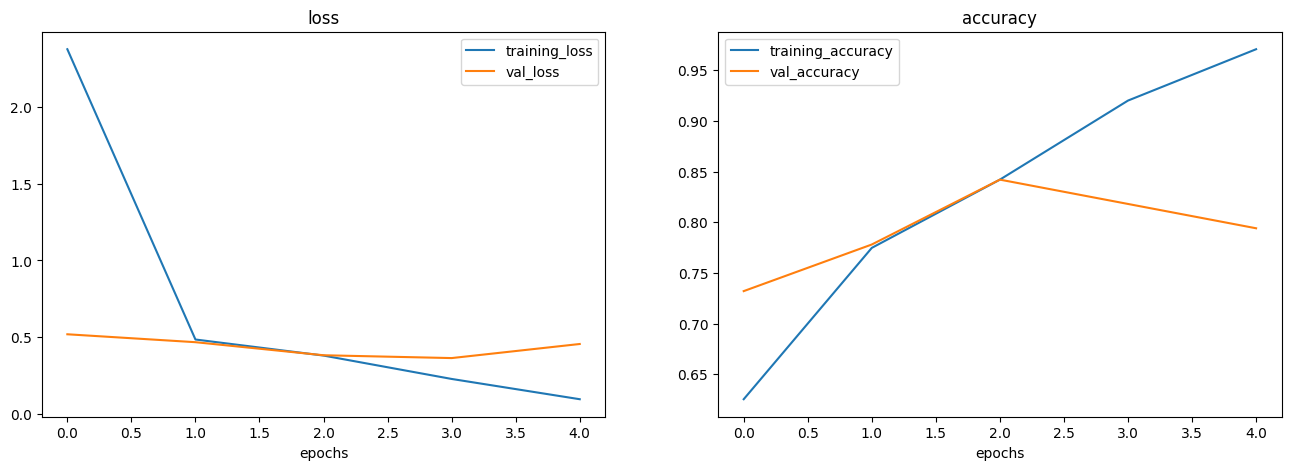

In [58]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other

### **6. Adjust the model parameters**

Fitting a machine learning model comes in 3 steps:
1. Create a baseline
2. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:
* Increas the number of conv layers
* Increate the number of conv filters
* Add another dense layer to the output of the flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [59]:
# Create the model (new baseline with MaxPool2D layer)
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [60]:
# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [61]:
history_5 = model_5.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 439ms/step - loss: 0.6440 - accuracy: 0.6173 - val_loss: 0.4945 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 20s 435ms/step - loss: 0.4742 - accuracy: 0.7820 - val_loss: 0.3616 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 20s 435ms/step - loss: 0.4322 - accuracy: 0.8013 - val_loss: 0.3719 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 20s 433ms/step - loss: 0.3940 - accuracy: 0.8307 - val_loss: 0.3344 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 21s 437ms/step - loss: 0.3824 - accuracy: 0.8220 - val_loss: 0.3237 - val_accuracy: 0.8640


In [62]:
model_5.evaluate(test_data)

16/16 [==============================] - 2s 148ms/step - loss: 0.3237 - accuracy: 0.8640


[0.3237314820289612, 0.8640000224113464]

In [63]:
# Get a summary of a model with max pooling
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

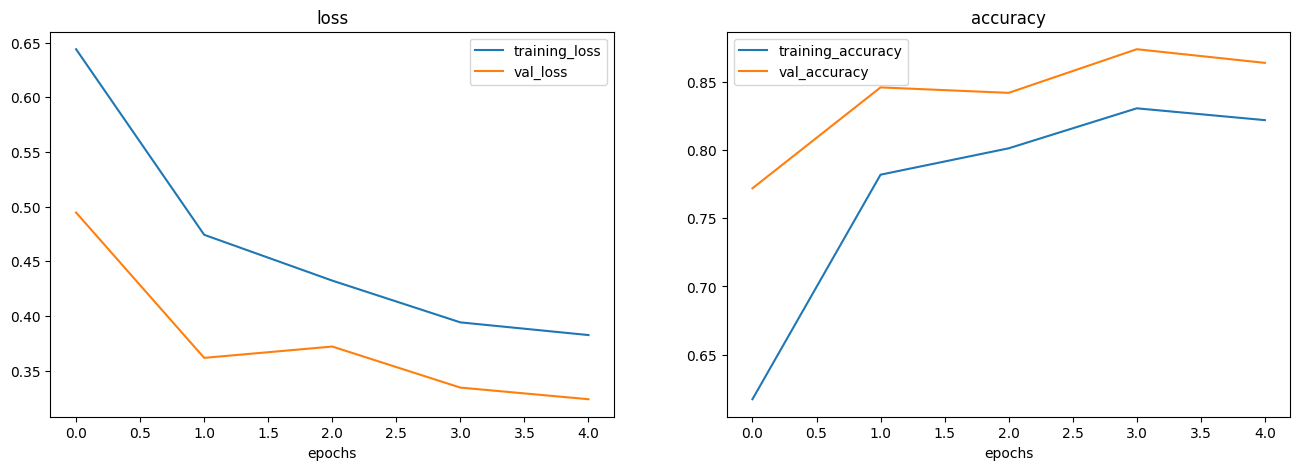

In [64]:
# Plot loss curves
plot_loss_curves(history_5)

### **Opening our bag of tricks and finding data augmentation**

In [65]:
# Create ImageData Generator training instance with data augmentation
train_datagen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                                                          rotation_range=0.2, # how much do you want to rotate and image
                                                                          shear_range=0.2, # how much do you want to shear an image
                                                                          zoom_range=0.2, # zoom in randomly on an image
                                                                          width_shift_range=0.2, # move your image aroung on the x-axis
                                                                          height_shift_range=0.2, # move your image aroung on the y-axis
                                                                          horizontal_flip=True) # do you want to flip an image

# Create ImageDataGenerator without data augmentation for the train dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

**🤔 Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have mode diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an inamge, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation.

In [66]:
# Import data and augment it from training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented data batches
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-augmented test data batches
print('Non-augmented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usually only performed only on the training data. Using `ImageDataAugmentation` built-in data augmentation parameters our images are left as they are in the directories, but are modified are they're loaded into the model.

Finally let's visualize some augmented data:

In [67]:
# Get sample data batches
images, labels = train_data.next() # non-augmented
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented, only data (images)

Showing image number: 24


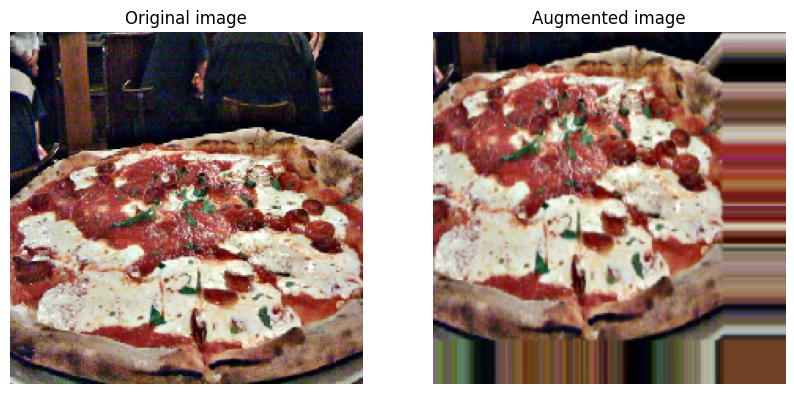

In [68]:
# Show original image and augmented image
random_number = random.randint(0, 31) # batch size is 32

print(f'Showing image number: {random_number}')
plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)
plt.show()

### **Build, compile and fit the model the same as model_5, but this time with augmented data**

In [69]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

In [84]:
# Build a model
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10 ,kernel_size=(3, 3) ,strides=(1, 1), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit a model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 528ms/step - loss: 0.7019 - accuracy: 0.4627 - val_loss: 0.6901 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6965 - accuracy: 0.5033 - val_loss: 0.6878 - val_accuracy: 0.5040
Epoch 3/5
47/47 [==============================] - 32s 673ms/step - loss: 0.6935 - accuracy: 0.5273 - val_loss: 0.6831 - val_accuracy: 0.5660
Epoch 4/5
47/47 [==============================] - 33s 698ms/step - loss: 0.6989 - accuracy: 0.5227 - val_loss: 0.6887 - val_accuracy: 0.6080
Epoch 5/5
47/47 [==============================] - 32s 670ms/step - loss: 0.6888 - accuracy: 0.5613 - val_loss: 0.6680 - val_accuracy: 0.6540


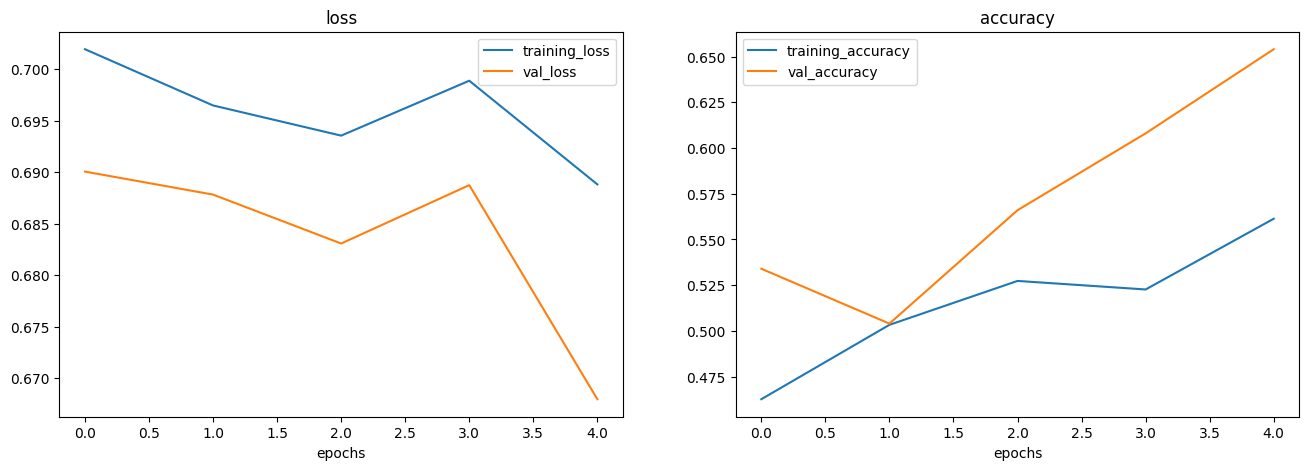

In [85]:
# Check uor model's training curves
plot_loss_curves(history_6)

**Let's shuffle our augmented training data and train another model (the same before) on it and see what happens.**

In [86]:
# Import data and augment if and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [90]:
# Create a model (same as model_5 and model_6)
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit a model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data this time
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 29s 596ms/step - loss: 0.6554 - accuracy: 0.6100 - val_loss: 0.5052 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 29s 615ms/step - loss: 0.5678 - accuracy: 0.7127 - val_loss: 0.4598 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 31s 661ms/step - loss: 0.5280 - accuracy: 0.7460 - val_loss: 0.4438 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 35s 746ms/step - loss: 0.5256 - accuracy: 0.7613 - val_loss: 0.3934 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 34s 731ms/step - loss: 0.4935 - accuracy: 0.7640 - val_loss: 0.3689 - val_accuracy: 0.8460


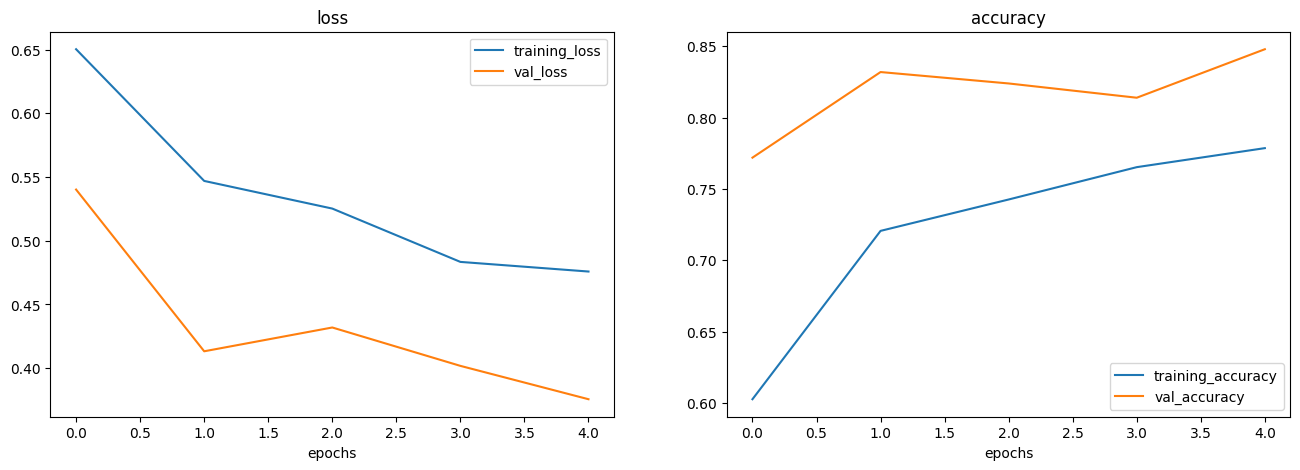

In [89]:
# Plot loss curves
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabeling it to learn features acress a wide array of images (in our case, pizza & steak at the same time, instead of just pizza and then steak).

### **7. Repeat until satisfied**

Since we already beaten our baseline there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** (to leverage what another image model has learned and adjust it for our own use case)

**Let's recreate the moder from the CNN explainer website (same as model_1) and see how it performs of augmented shuffled data**

In [91]:
# Create a model
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(2, 2), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile a model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit a model
history_8 = model_8.fit(train_data_augmented_shuffled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 43s 901ms/step - loss: 0.6524 - accuracy: 0.5973 - val_loss: 0.5429 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 58s 1s/step - loss: 0.5575 - accuracy: 0.7047 - val_loss: 0.4189 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 73s 2s/step - loss: 0.4930 - accuracy: 0.7660 - val_loss: 0.3662 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 71s 2s/step - loss: 0.4876 - accuracy: 0.7673 - val_loss: 0.3640 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 57s 1s/step - loss: 0.4992 - accuracy: 0.7613 - val_loss: 0.3676 - val_accuracy: 0.8380


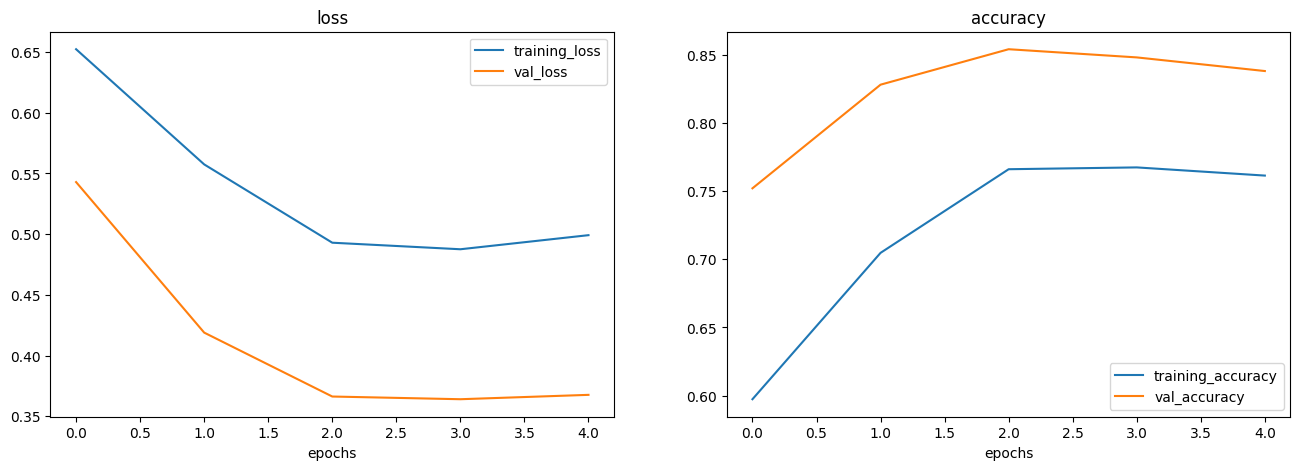

In [92]:
# Plot loss curves
plot_loss_curves(history_8)

### **Making a prediction with our trained model on a custom data**

In [116]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


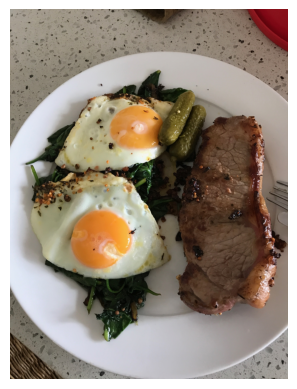

In [125]:
# View our example images
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg works in colab

steak = mpimg.imread('data/test_images/03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [126]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

🔑 **Note:** When you train a neural netowrk and you want to make a prediction and you want to make a prediction with your own custom data, it's important that you custom data is preprocessed into the same format as the data your model was trained on.

In [141]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224, expand_dims=True):
    '''
    Reads an image from filename, turns it into tensor and reshapes it 
    to (img_shape, img_shape, colour_channels).
    '''

    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into the tensor
    img = tf.image.decode_image(img)
    # Add one more dim because model is expecting multiple values, so it has one more one dim
    if expand_dims==True:
        img = tf.expand_dims(img, axis=0)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    

    return img

In [142]:
# Load in and preprocess our custom image
steak = load_and_prep_image('data/test_images/03-steak.jpeg')
steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [148]:
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 31ms/step


array([[0.85739064]], dtype=float32)

Looks like our custom image has been put through our model, however, it currently outputs a prediction probability, wouldn't it be nibe if we could visualize the image as well as the model's prediction.

In [147]:
# Remind ourselver of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [149]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [162]:
def pred_and_plot(model, filename, class_names=class_names, img_shape=224, expand_dims=True):
    '''
    Imports and image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    '''
    # Import the image and preprocess it
    img = load_and_prep_image(filename, img_shape=img_shape, expand_dims=expand_dims)

    # Make a prediction
    pred = model.predict(img)

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(tf.squeeze(img))
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False);

1/1 [==============================] - 0s 28ms/step


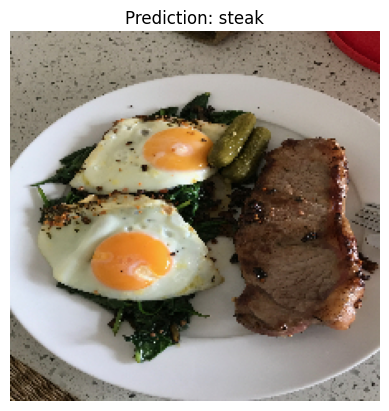

In [163]:
pred_and_plot(model = model_8,
              filename='data/test_images/03-steak.jpeg')

Our model works! Let's try it on another image...this time pizza

1/1 [==============================] - 0s 40ms/step


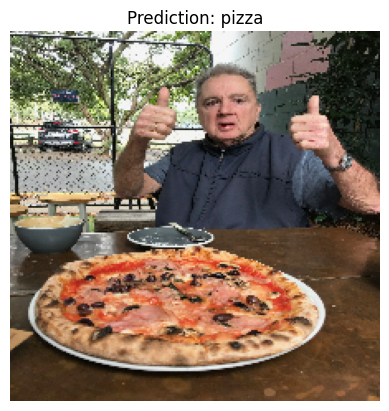

In [164]:
# Download another test cunstom image and make a prediction on it
pred_and_plot(model=model_8,
              filename='data/test_images/03-pizza-dad.jpeg')

# **Multi-class image classification**

We've just been throught a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're goving to step things up a noch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (git it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/reduce overfitting)
7. Repeat until satisfied

### **1. Import and become one with the data**

In [2]:
# Unzip our data
import zipfile
zip_ref = zipfile.ZipFile('data/10_food_classes_all_data.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

import shutil
shutil.rmtree('data\__MACOSX')

In [3]:
import os

# Walk throug 10 classes of food image data
for dirpath, dirnames, filenames in os.walk('data/10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 2 directories and 0 images in "data/10_food_classes_all_data".
There are 10 directories and 0 images in "data/10_food_classes_all_data\test".
There are 0 directories and 250 images in "data/10_food_classes_all_data\test\chicken_curry".
There are 0 directories and 250 images in "data/10_food_classes_all_data\test\chicken_wings".
There are 0 directories and 250 images in "data/10_food_classes_all_data\test\fried_rice".
There are 0 directories and 250 images in "data/10_food_classes_all_data\test\grilled_salmon".
There are 0 directories and 250 images in "data/10_food_classes_all_data\test\hamburger".
There are 0 directories and 250 images in "data/10_food_classes_all_data\test\ice_cream".
There are 0 directories and 250 images in "data/10_food_classes_all_data\test\pizza".
There are 0 directories and 250 images in "data/10_food_classes_all_data\test\ramen".
There are 0 directories and 250 images in "data/10_food_classes_all_data\test\steak".
There are 0 directories and 250 imag

In [4]:
# Setup the train and test directories
train_dir = 'data/10_food_classes_all_data/train/'
test_dir = 'data/10_food_classes_all_data/test/'

In [5]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['714991.jpg']
Image shape: (512, 512, 3)


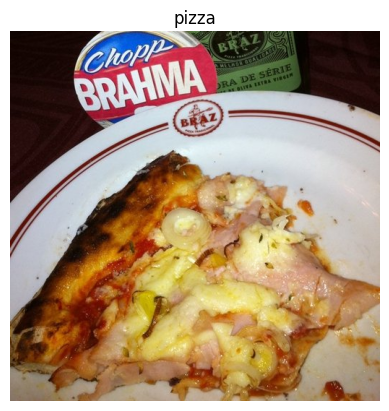

In [6]:
# Visualize, visualize, visualize
import functions
import random
img = functions.view_random_image(target_dir=train_dir, 
                                  target_class=random.choice(class_names))

### **2. Preprocess the data (prepare it for a model)**

In [7]:
import tensorflow as tf

# Rescale and augment the data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
                                                                #rotation_range=0.2,
                                                                #shear_range=0.2,
                                                                #zoom_range=0.2,
                                                                #width_shift_range=0.2,
                                                                #height_shift_range=0.2,
                                                                #horizontal_flip=True)
                                                                
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

# Load data in from directiories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### **3. Create a CNN model (start with a baseline)**

We've been talking a lot about the CNN explainer website...how about we just take their model (also on 10 classes) and use it for our problem?

In [9]:
# Create a model
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile a model
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit a model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=(len(test_data)))

Epoch 1/5
235/235 [==============================] - 119s 505ms/step - loss: 2.1597 - accuracy: 0.2037 - val_loss: 2.0066 - val_accuracy: 0.2816
Epoch 2/5
 42/235 [====>.........................] - ETA: 1:12 - loss: 1.9501 - accuracy: 0.3199

KeyboardInterrupt: 